<a href="https://colab.research.google.com/github/Slasher190/Data_Analysist_Project-/blob/main/PubgAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBG case study ✌



## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [3]:
# %ls

In [4]:
# %pip install kaggle

In [5]:
# %mkdir ~/.kaggle

In [6]:
# %cp kaggle.json ~/.kaggle/

In [7]:
# !chmod 600 ~/.kaggle/kaggle.json

### Downloading Data "pubg-finish-placement-prediction" from Kaggle

In [8]:
# !kaggle competitions download -c pubg-finish-placement-prediction

In [9]:
# %ls

In [10]:
# !unzip pubg-finish-placement-prediction.zip

In [11]:
# %ls


In [12]:
import pandas as pd

## Here PUBG Dataset Loaded

In [13]:
train = pd.read_csv('./train_V2.csv')
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Now doing some analytics

In [14]:
train.shape #(Row,Column)

(4446966, 29)

#### Required Library

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [16]:
train.info() #to get information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [17]:
train.isnull().sum() #count null values 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64



```
# Here we find 1 data that has null value 
# dataset is very large so we can eliminate 1 row it will not affect any accuracy
```



In [18]:
train.dropna(inplace=True) #it will drop null row 

In [19]:
train.shape

(4446965, 29)

# Data Visualization

## Kills 
### 1. mean() (average kills)
### 2. quantile(0.99) - (99 percentile of kills)
### 3. max() (maximum Kills)

In [20]:
print(train['kills'].mean())
print(train['kills'].quantile(0.99))
print(train['kills'].max())

0.9247835321393355
7.0
72




```
# average killing ~1
# the person has 99 percentile max kills = 7 (99% of player kills <= 7)
# max kills by a person = 72
```



In [21]:
train['kills'].value_counts()  #no . of kills by single player

0     2529721
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       2799
12       1755
13       1137
14        757
15        484
16        325
17        234
18        165
19        112
20        109
22         77
21         70
23         47
24         44
25         27
26         27
28         22
27         21
30         13
29         13
31         13
33         12
36          8
38          7
35          7
34          5
41          5
37          5
32          4
53          4
40          4
39          4
43          3
42          3
56          2
55          2
44          2
46          2
57          2
49          1
45          1
47          1
48          1
50          1
66          1
65          1
72          1
Name: kills, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Kill count')

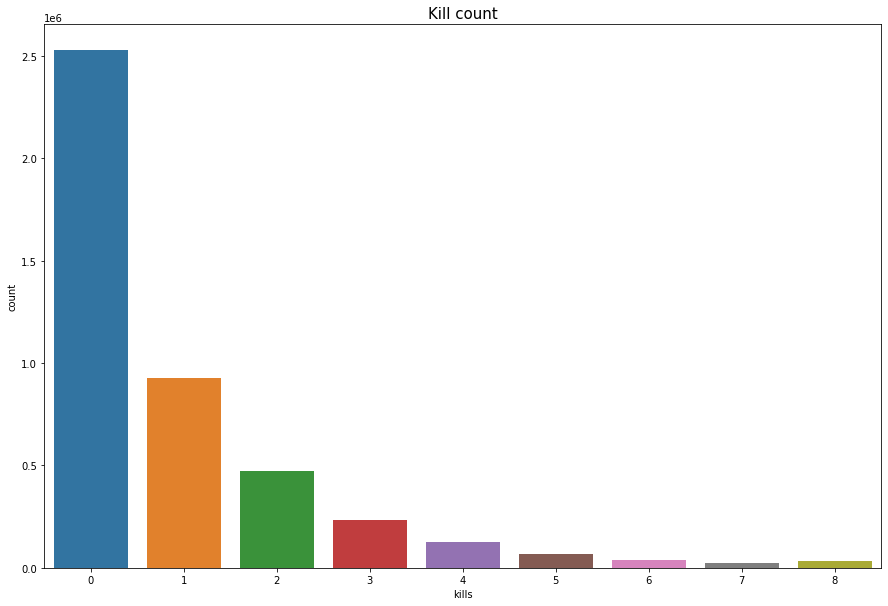

In [22]:
data = train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)] = 8
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill count",fontsize=15)

#### Peoples having Zero kills but give Damage to the opponent

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

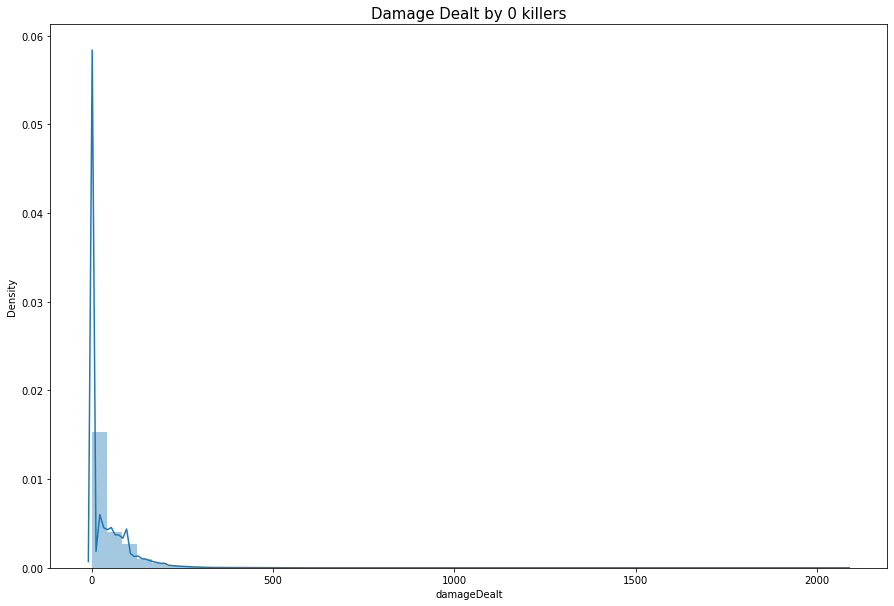

In [23]:
data = train.copy()
data = data[data['kills'] == 0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.plot()



```
# Max of them give Zero damage only few of them give more than 500 damageDealt
```



## Now checking correlations between Players and their killings

### People's Won without a single kill

In [24]:
print("Player have won without a single kill ",len(data[data['winPlacePerc']==1]),"that have total", 100*len(data[data['winPlacePerc']==1])/len(train),"%")

Player have won without a single kill  16666 that have total 0.37477245717022734 %


### People's won without giving a single damage 

In [25]:
data1 = train[train['damageDealt']==0].copy()
print("Player have won without a Dealting Damage ",len(data1[data1['winPlacePerc']==1]),"that have total", 100*len(data1[data1['winPlacePerc']==1])/len(train),"%")

Player have won without a Dealting Damage  4770 that have total 0.10726416780883141 %


### Probability of winning by No. of killings by the candidates

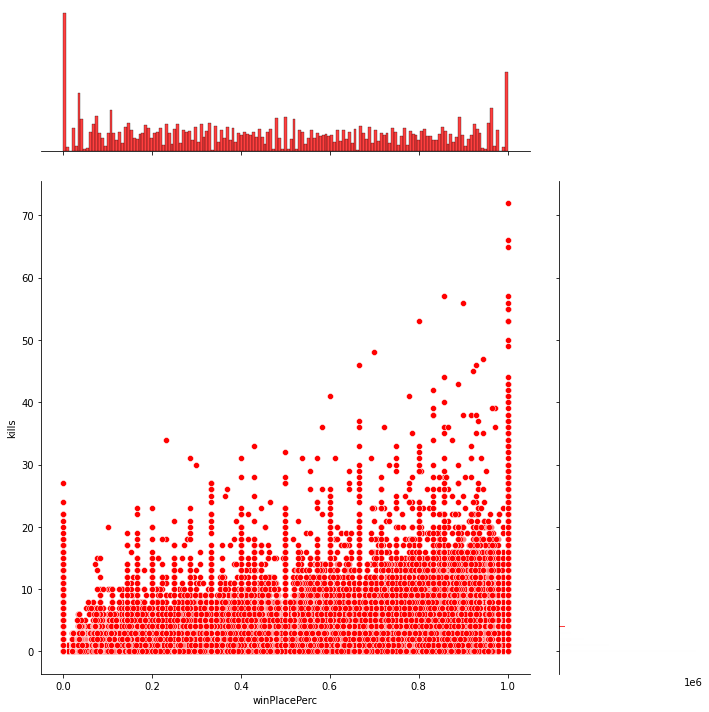

In [26]:
sns.jointplot(x='winPlacePerc', y='kills', data = train, height=10, ratio=3, color='r')

In [27]:
data1.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.0,0,0.0,0,0,244.8,1,1466,0.4444
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.0,0,0,0,96,...,0,0.0,0,0.0,0,0,13.5,1,1497,0.0000
12,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0,0,0.0,0,0,0,37,...,0,6639.0,0,0.0,0,0,2784.0,6,0,0.9286
18,7bd224781f064b,6dde607d151819,733af30cc00099,0,0,0.0,0,0,0,79,...,0,0.0,0,0.0,0,0,137.4,2,0,0.1923
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0,0.0,0,0.0,0,0,0.0,0,0,0.0000


### Percentage of Winning by total killings

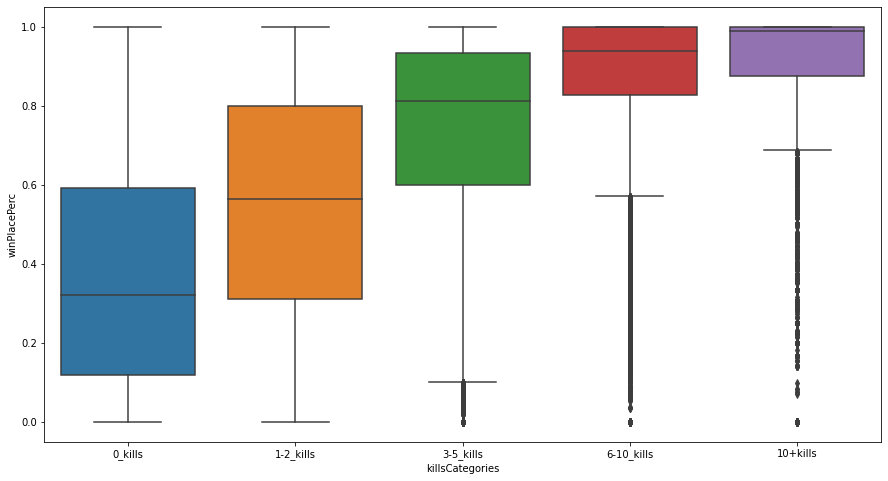

In [28]:
kills = train.copy()
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,72],labels = ['0_kills','1-2_kills','3-5_kills','6-10_kills','10+kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()

## People's kill and based on their kills Winning pprobabilities. 
### Example


```
# The person who has 1-2 kills then their probabilty of winning are lies between ~(0.3-0.75)
```



# Talking about relation between Walking Distance and Winning Possibilities

In [29]:
print(train['walkDistance'].mean())
print(train['walkDistance'].quantile(0.99))
print(train['walkDistance'].max())

1154.218118648076
4396.0
25780.0


## Density of a person who covered the distance 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


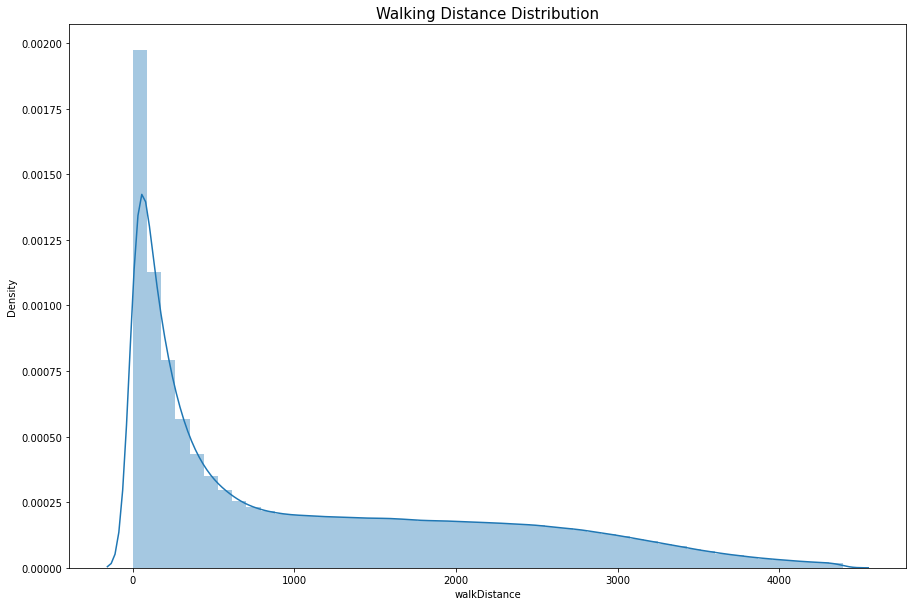

In [30]:
data = train.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title('Walking Distance Distribution',fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

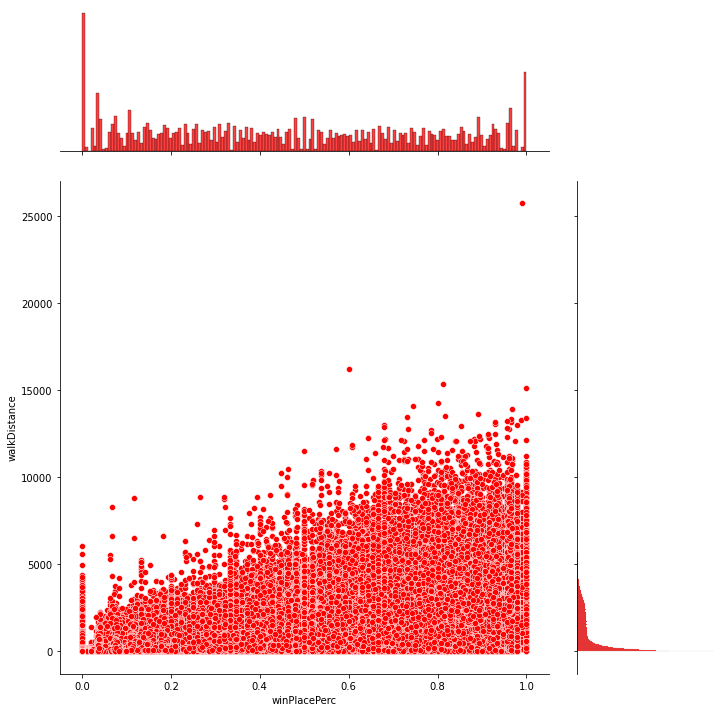

In [31]:
sns.jointplot(x='winPlacePerc',y='walkDistance',data=train,height=10,ratio=3,color='r')

### the graph clearly shows the person who covered the more distance then the probabilty of winning also more 

In [32]:
print(train['rideDistance'].mean())
print(train['rideDistance'].quantile(0.99))
print(train['rideDistance'].max())

606.1158054527955
6966.0
40710.0


### Distance travel by Riding vehicles nby the person's

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


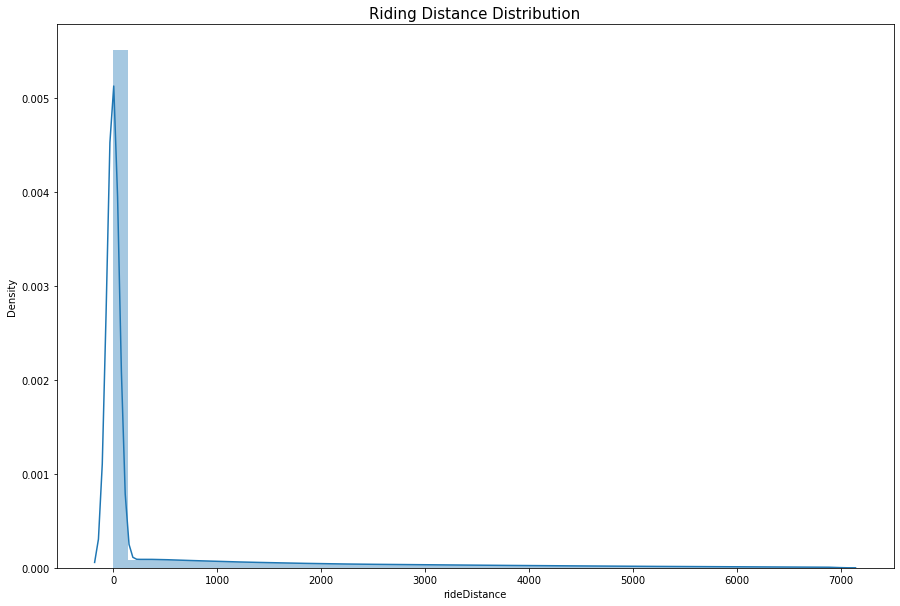

In [33]:
data = train.copy()
data = data[data['rideDistance'] < data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title('Riding Distance Distribution',fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

### in above max people rides distance ZERO

In [34]:
print((len(train[train['rideDistance'] == 0])/len(train))*100)

74.41992460026108


### ~74% not driving car

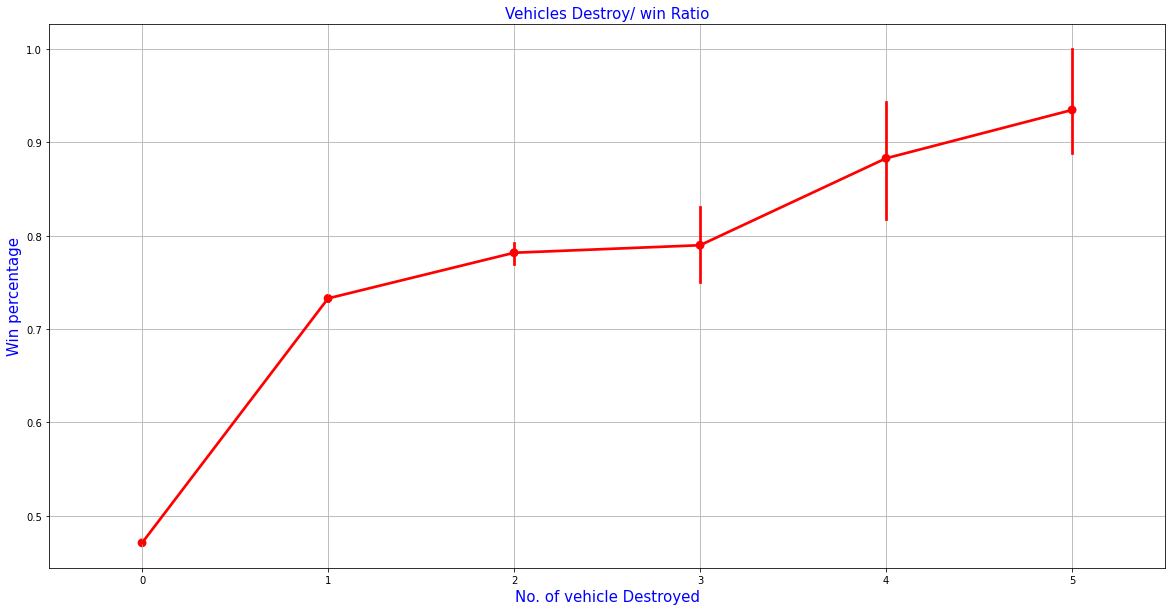

In [35]:
plt.subplots(figsize=(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='red',alpha=0.8)
plt.xlabel('No. of vehicle Destroyed',fontsize=15,color='blue')
plt.ylabel('Win percentage',fontsize=15,color='blue')
plt.title('Vehicles Destroy/ win Ratio',fontsize=15,color='blue')
plt.grid()
plt.show()

## Here graph shows number of vehicle destroy winning probabilities increases
### example 
### A man destroyed 3 cars then winning probability range is ~(0.75,0.83)

In [36]:
####

# Factors on Healing And Boosting




In [37]:
print(train['heals'].mean())
print(train['heals'].quantile(0.99))
print(train['heals'].max())

1.3701475050961722
12.0
80


In [38]:
print(train['boosts'].mean())
print(train['boosts'].quantile(0.99))
print(train['boosts'].max())

1.1069079698176172
7.0
33


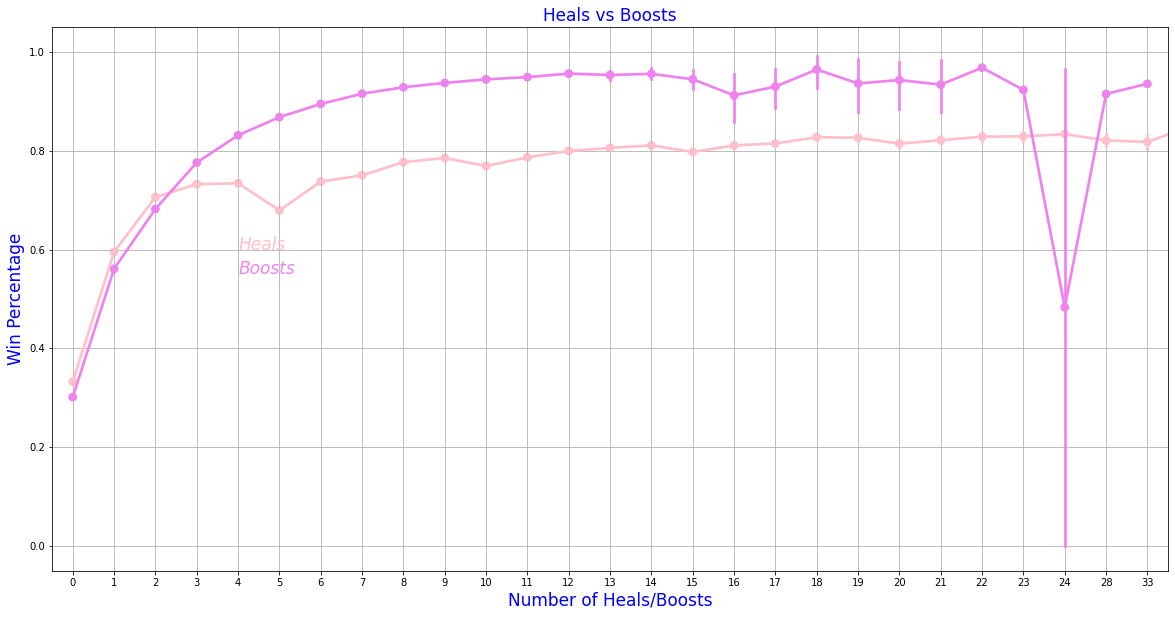

In [39]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=train,color='pink',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=train,color='violet',alpha=0.8)

plt.text(4,0.6,'Heals',color='pink',fontsize=17,style='italic')
plt.text(4,0.55,'Boosts',color='violet',fontsize=17,style='italic')

plt.xlabel('Number of Heals/Boosts',fontsize=17,color='blue')
plt.ylabel('Win Percentage',fontsize=17,color='blue')
plt.title('Heals vs Boosts',fontsize=17,color='blue')

plt.grid()
plt.show()

### here graph shows as much as we take the boost winning probability increases.

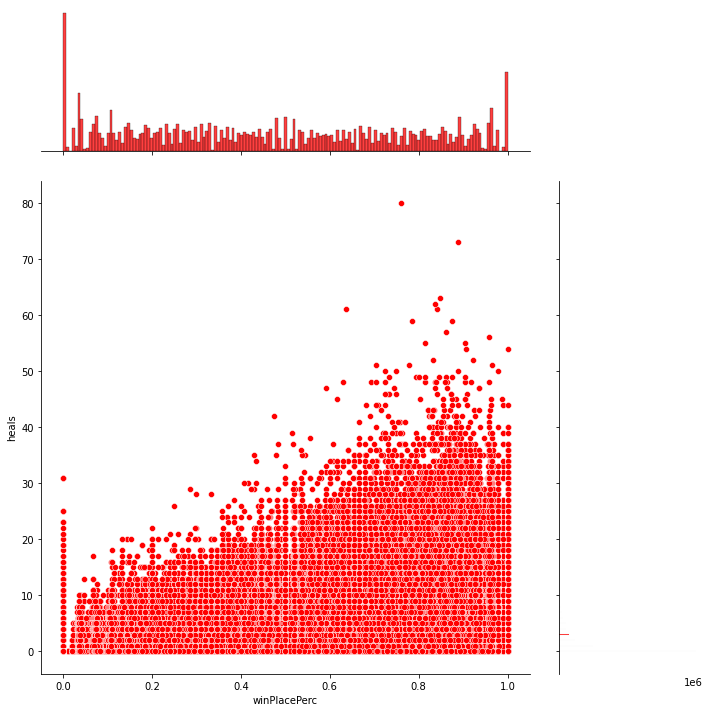

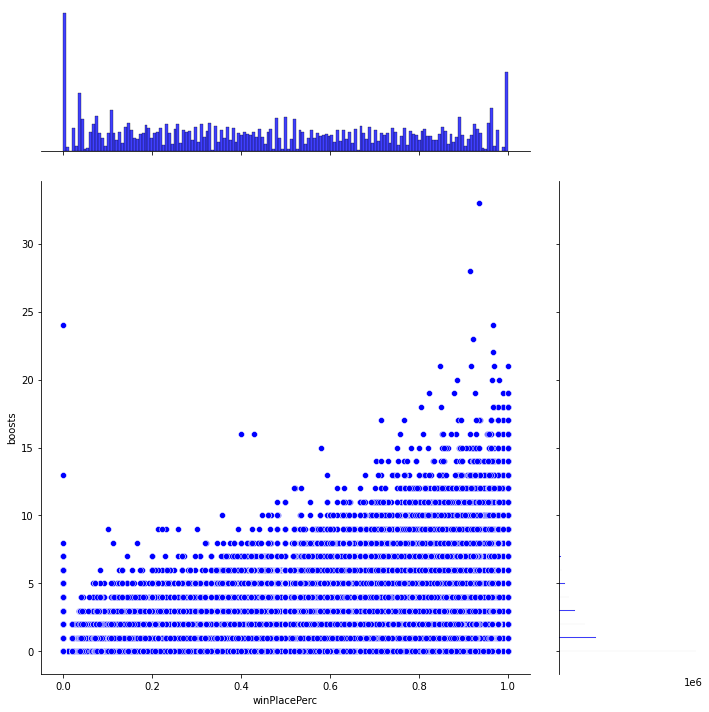

In [40]:
sns.jointplot(x='winPlacePerc',y='heals',data=train,height=10,ratio=3,color='r')
sns.jointplot(x='winPlacePerc',y='boosts',data=train,height=10,ratio=3,color='b')

# Number of kills based on Groups

```
# This is formatted as code
```

ing

## -> Solo = 100 groups of single member
## -> Dual = 50 groups of 2 members
## -> Squad = 25 groups of 4 members

In [41]:
solo = train[train['numGroups'] > 50]
dual = train[(train['numGroups'] <= 50) & (train['numGroups'] > 25)]
squad = train[train['numGroups'] <= 25]

In [42]:
print(len(solo))
print(len(dual))
print(len(squad))

709111
3295326
442528


In [43]:
print((len(solo)/len(train))*100)
print((len(dual)/len(train))*100)
print((len(squad)/len(train))*100)

15.945954150752254
74.10280944419397
9.951236405053784


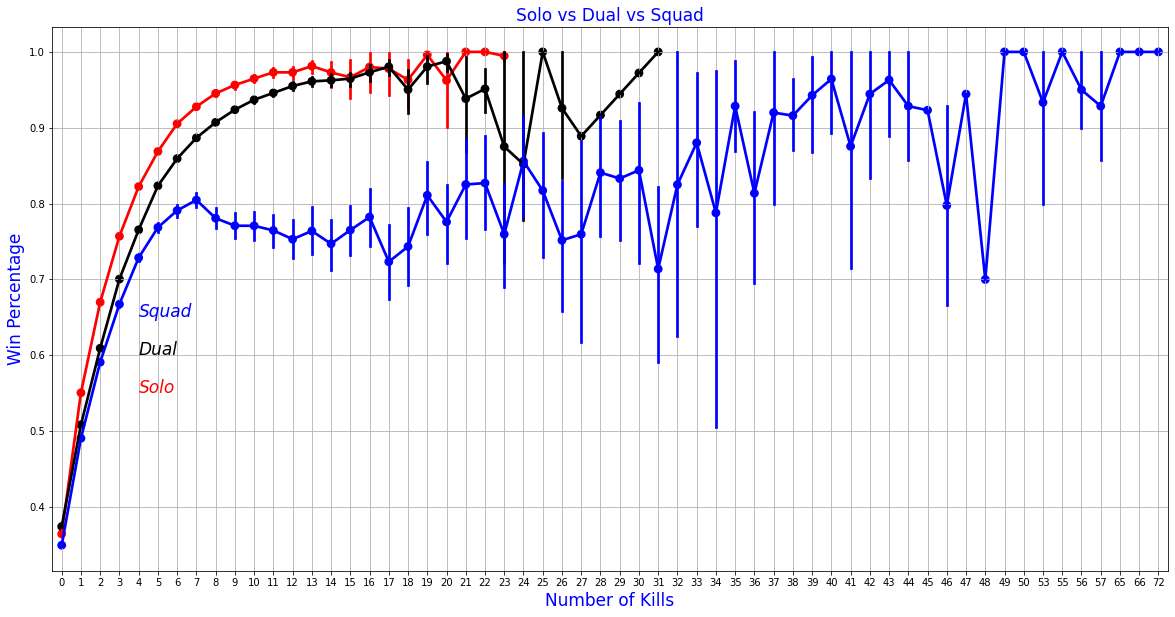

In [44]:
data = train.copy()

plt.subplots(figsize=(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solo,color='red',alpha=1.0)
sns.pointplot(x='kills',y='winPlacePerc',data=dual,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squad,color='blue',alpha=0.8)

plt.text(4,0.55,'Solo',color='red',fontsize=17,style='italic')
plt.text(4,0.6,'Dual',color='black',fontsize=17,style='italic')
plt.text(4,0.65,'Squad',color='blue',fontsize=17,style='italic')

plt.xlabel('Number of Kills',fontsize=17,color='blue')
plt.ylabel('Win Percentage',fontsize=17,color='blue')
plt.title('Solo vs Dual vs Squad',fontsize=17,color='blue')

plt.grid()
plt.show()

# Correlation between all features

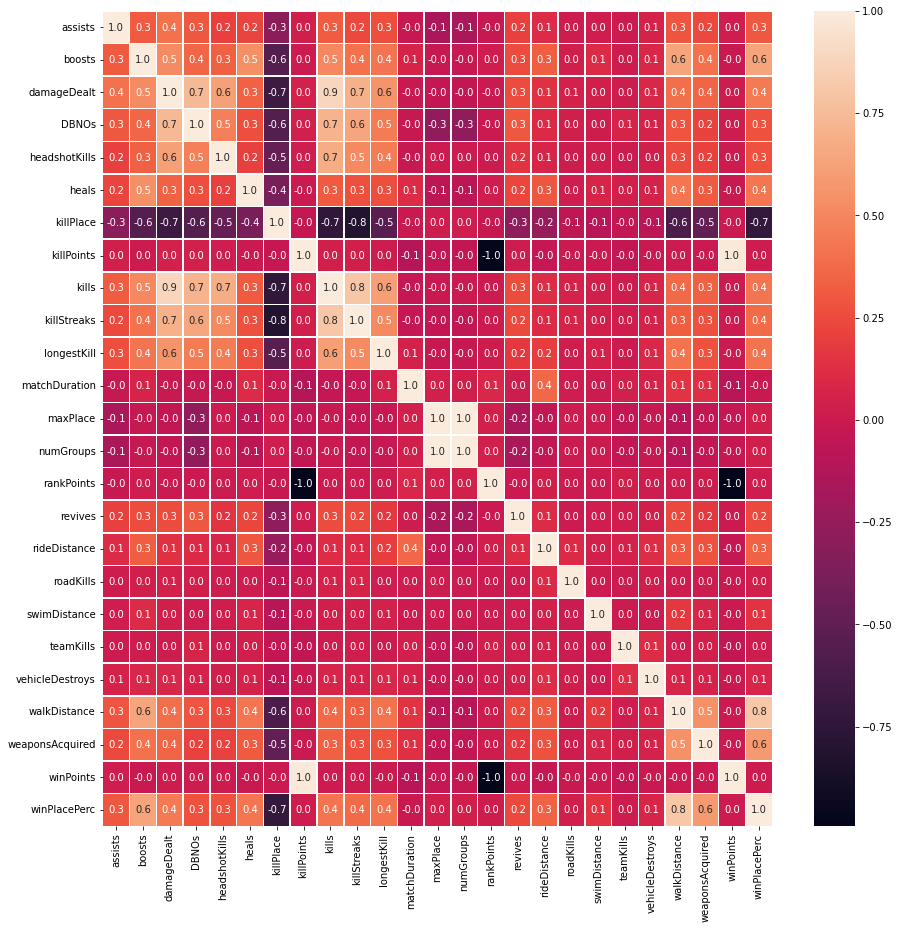

In [45]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)

## finding top 5 correlation

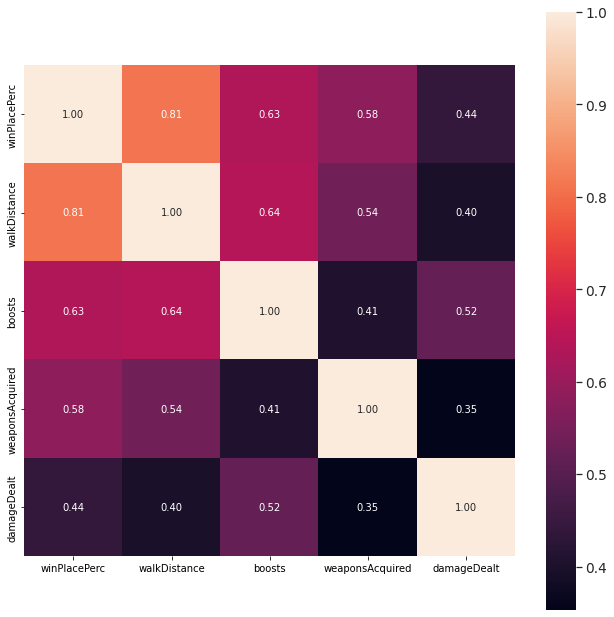

In [46]:
k = 5
f,ax = plt.subplots(figsize=(11,11))
cols = train.corr().nlargest(k,'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='0.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

## Pair plot for Necessary Features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


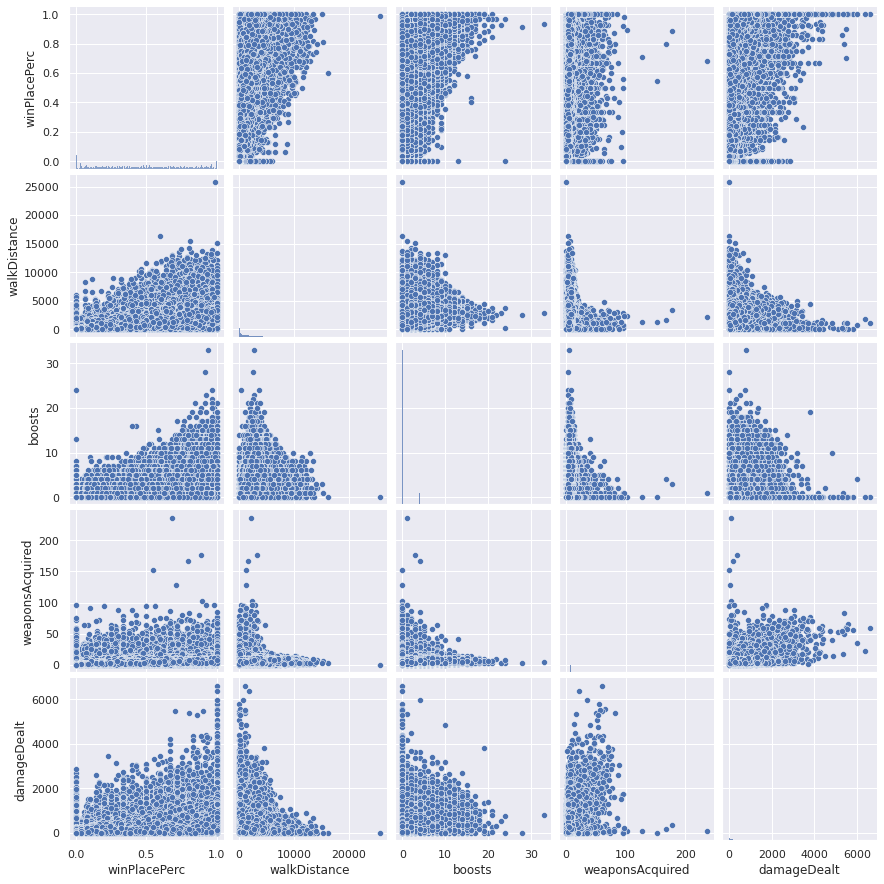

In [47]:
sns.set()
cols = ['winPlacePerc','walkDistance','boosts','weaponsAcquired','damageDealt']
sns.pairplot(train[cols],size=2.5)
plt.show()